In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
cab_data=pd.read_csv('Cab_Data.csv')
city=pd.read_csv('City.csv')
customer_id=pd.read_csv('Customer_ID.csv')
transaction_id=pd.read_csv('Transaction_ID.csv')

In [219]:
cab_data=cab_data.drop_duplicates(subset=['Transaction ID'])
city=city.drop_duplicates(subset=['City'])
customer_id=customer_id.drop_duplicates(subset=['Customer ID'])
transaction_id=transaction_id.drop_duplicates(subset=['Transaction ID'])

In [220]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 21.9+ MB


In [221]:
cab_data['Profit']=cab_data['Price Charged']-cab_data['Cost of Trip']

In [222]:
cab_data['Date of Travel']=pd.to_datetime(cab_data['Date of Travel'])

In [223]:
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
359387,10440101,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420
359391,10440107,2018-02-01,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,13.9608


Company     Date of Travel
Pink Cab    2016              1.713511e+06
            2017              2.033655e+06
            2018              1.560162e+06
Yellow Cab  2016              1.392700e+07
            2017              1.657598e+07
            2018              1.351740e+07
Name: Profit, dtype: float64

Company     Date of Travel
Pink Cab    2016              25080
            2017              30321
            2018              29310
Yellow Cab  2016              82239
            2017              98189
            2018              94253
Name: Profit, dtype: int64

Company     Date of Travel
Pink Cab    2016               68.321819
            2017               67.070839
            2018               53.229689
Yellow Cab  2016              169.347821
            2017              168.817057
            2018              143.416122
Name: Profit, dtype: float64

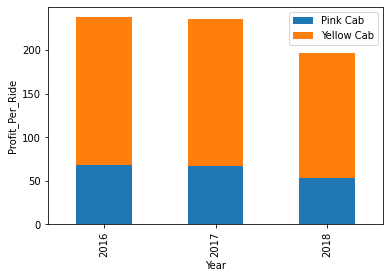

In [224]:
cab_Profit=cab_data.groupby(['Company',cab_data['Date of Travel'].dt.year])['Profit'].sum()
cab_Rides=cab_data.groupby(['Company',cab_data['Date of Travel'].dt.year])['Profit'].count()
cab_profit_per_ride=cab_Profit/cab_Rides
display(cab_Profit)
display(cab_Rides)
display(cab_profit_per_ride)

df2=cab_profit_per_ride.reset_index()
pivot = df2.pivot(index='Date of Travel', columns='Company', values='Profit')

pivot.plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Profit_Per_Ride')
plt.legend()
plt.show()


In [225]:
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 640.0+ bytes


,City,Population,Users,user_percent
0,NEW YORK NY,8405837.0,302149.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,2.313756


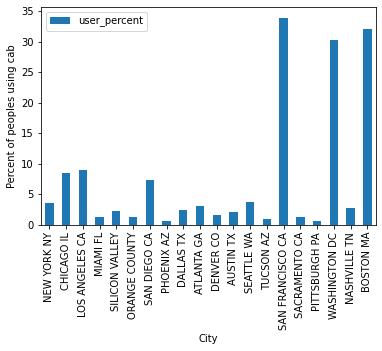

In [226]:
city['user_percent']=(city['Users']/city['Population'])*100
display(city.head())
city.plot(kind='bar',x='City',y='user_percent')

plt.xlabel('City')
plt.ylabel('Percent of peoples using cab')

plt.show()

In [227]:
customer_id.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [228]:
transaction_id.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [229]:
merged_transaction=pd.merge(transaction_id,customer_id, on='Customer ID')
merged_transaction.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [230]:
cab_data_merged=pd.merge(cab_data,city,on='City')

In [231]:
cab_data_merged.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,user_percent
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,814885.0,24701.0,3.031225
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,814885.0,24701.0,3.031225


In [232]:
master_data=pd.merge(cab_data_merged,merged_transaction,on='Transaction ID')

In [233]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Population', 'Users',
       'user_percent', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)'],
      dtype='object')

In [234]:
master_data=master_data.drop(['Cost of Trip','Population'],axis=1)
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Profit', 'Users', 'user_percent', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')

In [235]:
master_data=master_data.drop_duplicates(subset=['Transaction ID'])
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Profit              359392 non-null  float64       
 7   Users               359392 non-null  float64       
 8   user_percent        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

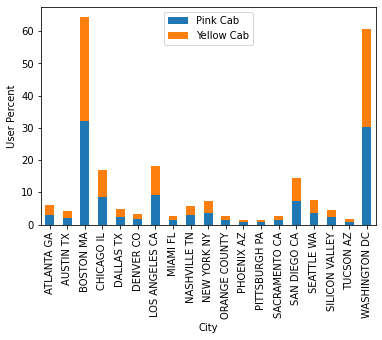

In [236]:
grouped_master=master_data.groupby(['Company','City'])['user_percent'].max()
df2=grouped_master.reset_index()
pivot = df2.pivot(index='City', columns='Company', values='user_percent')

pivot.plot(kind='bar', stacked=True)

plt.xlabel('City')
plt.ylabel('User Percent')
plt.legend()
plt.show()

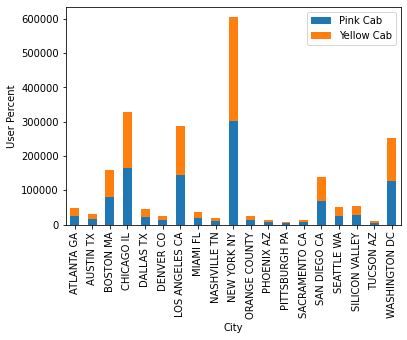

In [237]:
grouped_master=master_data.groupby(['Company','City'])['Users'].max()
df2=grouped_master.reset_index()
pivot = df2.pivot(index='City', columns='Company', values='Users')

pivot.plot(kind='bar', stacked=True)

plt.xlabel('City')
plt.ylabel('User Percent')
plt.legend()
plt.show()

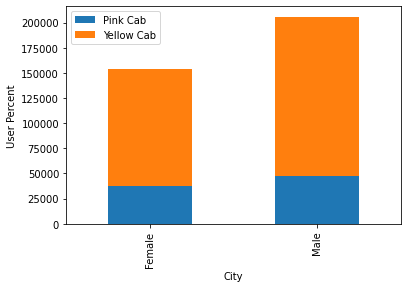

In [238]:
grouped_master=master_data.groupby(['Company','Gender'])['Users'].count()
df2=grouped_master.reset_index()
pivot = df2.pivot(index='Gender', columns='Company', values='Users')

pivot.plot(kind='bar', stacked=True)

plt.xlabel('City')
plt.ylabel('User Percent')
plt.legend()
plt.show()

EDA Recommendation and hypothesis Result

In [239]:
from scipy.stats import chi2_contingency, chi2

grouped_master=master_data.groupby(['Company','City'])['Users'].count()
df2=grouped_master.reset_index()
pivot = df2.pivot(index='Company', columns='City', values='Users')


stat, p, dof, expected = chi2_contingency(pivot)

# interpret test-statistics
prob=0.95
critical = chi2.ppf(prob, dof)
print(critical)
if abs(stat) >= critical:
 print('reject H0')
else:
 print('fail to reject H0')

28.869299430392623
reject H0


We have taken the null hypothesis or H0 that Pink Cab is being used more or is more profitable to invest in with the accuracy of 95%. It turns out that it does not as our hypothesis is rejected. So I conclude that Yellow Cab is more popular in different cities and is a good company to invest in.

We have seen trends on yellow and Pink Cab companies across years based on the amount of profit they make per ride and Yellow Cab turns out to be most profitable company to invest in.